# Exam question solution

Juan Valdez can earn  u = 10 as a farm worker.  Alternatively, if he can raise a lump-sum of I=60, he can start a risky coffee-growing project. Juan is risk-neutral. The project can ‘succeed’ and generate project return Xs =100 or it can ‘fail’ in which case it will generate Xf =0. The probability of success depends on Juan’s chosen level of ‘diligence.’  When he is diligent the project succeeds with probability p = 0.90 (for an expected gross return of 0.9*100+0.1*0= 90). If instead he chooses to be ‘non-diligent’ he diverts effort and/or financial resources to other projects that give him private benefits B=10 but this lowers the probability of success on his coffee project to q = 0.45 (for expected project returns of 45). 

a)	Show that if Juan has 60 of his own funds he will start the project and be diligent. That is, show that he earns more from self-funding and being diligent than he does from either working as an unskilled worker or self-funding and being non-diligent (include the private benefits he would capture).

$$\max_{c_s, c_f}  p (X_s - c_s) + (1-p) (X_f - c_f) - I$$

subject to the agent's participation (PC) constraint:

$$ p c_s + (1-p) c_f \geq \bar u $$

Without loss of generality in what follows we will set $\bar u = 0$, so in the ideal of circumstances the government would be able to hire the agent away from their next best opportunity by paying them amount normalized to zero. 

and an incentive compatibility (IC) constraint:

$$ p c_s + (1-p) c_f \geq q c_s + (1-q) c_f + \bar B $$ 

Note that we will at times write this problem compactly as:

$$\max_{c_s,c_f}  E(X|p) - E(c|p) - I$$

s.t.

$$E(c|p) \geq \bar u$$

$$E(c|p) \geq E(c|q) + \bar B$$

The IC constraint can be rewritten:
    
$$ c_s \geq c_f + \frac{\bar B}{p-q}  $$     

This can be satisfied at minimum cost when this constraint binds.  This tells us that in the event of project success the agent must receive a 'bonus' of $\frac{\bar B}{p-q}$ over what they get paid for failure outcomes.  This higher reward for success compared to failure is what induces the agent to want to be diligent and increase the probability of success from $q$ to $p$.  The contractual cost of this renumeration strategy is then $p c_s + (1-p) c_f$ or:

$$E(c|p) = c_f + p \frac{\bar B}{\Delta}$$

where $\Delta = p-q$which then means that the expected net benefit of the government project is:

$$E(X|p) -I - c_f - p \frac{\bar B}{\Delta}$$ 

Note that we earlier normalized the agent's next best employment opportunity to a renumeration of zero.  If the government could get local agents to competitively bid against each other for the government contract the agent's contract could be made to bind, but this in turn would require:

$$c_f = - p \frac{\bar B}{\Delta}+\bar u$$
$$c_s = (1-p) \frac{\bar B}{\Delta}+\bar u$$

One way to think of this is that the agent is made to pay a fine of $- p \frac{\bar B}{\Delta}$ when the project fails while if the project succeeds she earns a reward of $(1-p) \frac{\bar B}{\Delta}$

A possible problem with this type of project is that it may be difficult for the government to impose a penalty on agents when the project fails (e.g. the local contractor leaves town when the bridge collapses or the incidence of malaria cases surges).  One way to try to resolve that problem is by asking local contractors to post a **bond** but this solution may be hard to implement particularly in poor communities where the agents are poor to start with. 

The consequence of not being able to impose a fine when the project fails is that we have to now impose yet another constraint on the contract design problem, a **limited liability** constraint of the form

$$c_f \geq 0$$

for example if the heaviest fine that can be imposed is to pay the local agent nothing when the project fails. The lowest cost way to renumerate the agent will be for this limited liability constraint and the incentive compatibility constraints to bind (to set the punishment as high as possible and the bonus as low as possible, compatible with maintaining incentives.  With $c_f =0$ an extra bonus must now be paid folowing success outcomes to contine to satisfy the incentive constraint. But this increases the expected cost of renumeration and reduces expected benefits from the project to:

$$E(X|p) - I - p \frac{\bar B}{\Delta}$$ 


The last term $p\frac{\bar B}{\Delta}$ is sometimes referred to as an 'information rent' that must be paid to the agent that arises due to the asymmetric information problem.

## An Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [2]:
def E(xs,xf,p):
    """Expectation operator """
    return p*xs + (1-p)*xf

Consider a project with the following characteristics:

In [29]:
I = 60          # Lump sum investment to start project
Xs = 100        # project success return
Xf = 0          # project failure return
p = 0.90        # probability of success when diligent
q = 0.45        # probability of success when non-diligent
EX = E(Xs,Xf,p) # Gross expected project return
ubar = 10        # Consumer reservation income  
B = 10          # private benefits to being non-diligent

In [30]:
print('Expected returns Diligent (p): {}, Non-diligent (q): {}'.format(E(Xs,Xf,p), E(Xs,Xf,q)))

Expected returns Diligent (p): 90.0, Non-diligent (q): 45.0


This project fails only 1 percent of the time when the agent is non-diligent (corrupt) but fails 50 percent of the time when they are non-diligent (corrupt).  We associate non-diligence with an opportunity to divert $\bar B$ in funds to private uses.

As derived above the optimal renumeration contract calls for the agent to pay a big fine for failure and earn a positive reward for success:

In [31]:
cf = -p*B/(p-q) + ubar
cs = (1-p)*B/(p-q) + ubar

In [32]:
print('(c_f, c_s) =({:5.1f}{:5.1f})'.format(cf, cs))

(c_f, c_s) =(-10.0 12.2)


In [33]:
print('consumer and bank expected payments:')
E(cs,cf,p), E(Xs-cs, Xf-cf,p) - I

consumer and bank expected payments:


(10.0, 20.0)

In expectation this covers the agent's opportunity cost of funds $\bar u$. Since the incentive compatibility constraint is met (by construction)  when she is diligent:

### Diagram 

In [34]:
def zeroprofit(c):
    return EX/p -((1-p)/p)*c - I/p

def IC(c):
    return c + B/(p-q)

def BPC(c,ubar):
    return ubar/p - ((1-p)/p)*c

In [35]:
cf_min, cf_max = -40,10
c = np.arange(cf_min, cf_max)

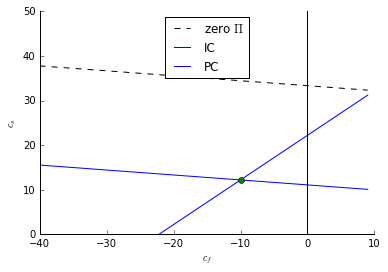

In [36]:
ax = plt.subplot(111)
ax.plot(c,zeroprofit(c), 'k--',label='zero $\Pi$')
ax.plot(c,IC(c), label='IC')
ax.plot(c,BPC(c,ubar), label='PC',color='b')
ax.plot(cf,cs,marker='o')
ax.legend(loc='upper center')
ax.set_xlabel('$c_f$'), ax.set_ylabel('$c_s$')
ax.axvline(0, color='k')
ax.set_ylim(0,50)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

The principal extracts

In [37]:
EX - I - ubar

20.0

Under this contract the agent will be diligent even though they cannot be observed.  Had they been non-diligent the principal would earn

In [38]:
q*(Xs- cs) + (1-q)*(Xf-cf) - I

-15.0

In [39]:
q*(cs) + (1-q)*(cf) +B

10.0

### Limited Liability constraints

In the example above the agent is asked to pay the principal in the event of failure ($c_f <0$). Suppose however that the agent cannot be made to pay the fine (e.g. they cannot post bond and run away before paying the fine).  

Suppose in fact that the worst fine we can impose is that they pay $c_f = -5$.  

When that is the case the cheapest way to satisfy the incentive compatibility constraint is to set:

In [40]:
cf = -5
cs = -5 + B/(p-q)

Which then means that in expectation the agent earns an information rent of 

In [41]:
E(cs,cf,p)

15.0

This is above their reservation utility $bar u$ and this contract is therefore quite a bit more expensive to the principal.  Their net return is now

$$E(X,p) - I - E(C,p)$$
$$E(X,p) - I - p/(p-q)$$

And the net benefits to the project are greatly reduced to:

In [44]:
EX - I - E(cs,cf,p)

15.0

The net benefits have been reduced by the heavy cost of incentive contract to keep the agent diligent or non-corrupt.

But this is still better than allowing the agent to be corrupt.  

In [43]:
q*(Xs-cs)+(1-q)*(Xf-cf) - I 

-20.0

As we can see from the diagram above the principal can contract with agents who face limited liability but they earn less from agents where the LL constraint binds.  The limited liability constraint means the agent must earn a rent in excess of their reservation utility. 

Suppose the most we can take away from the agent is an amount $A$, equal for example to the amount of resources that can be seized or that they posted as bond or collateral.  

The cheapest way to satisfy the IC is then:

$c_f = -A$

$c_s = -A + B/(p-q)$

Which implies the agent's expected repayment is:

$$E(c|p) = - A + \frac{p B}{p-q}$$

which will be more than their reservation wage $\bar u$ as long as $A <  p  \frac{B}{p-q} \bar u$

### Minimum collateral requirement

What is the minimum collateral requirement below which the contract cannot both satisfy the incentive compatibility constraint and guarantee at least zero profits to the principal?

Substitute the expected repayment under limited liability (above) into the principal's zero profit condition and solve for A (on the diagram above this is the $c_f$ at the intersection of the IC constraint and the principal's zero profit condition:

$E(X|p) - E(c|p) - I = 0$

$E(X|p) + A - \frac{p \dot B}{p-q}  - I = 0$

$$\underline{A} = \frac{p B}{p-q} - [E(X|p) - I] $$

For our running example this minimum collateral requirement is:

In [123]:
Amc = p*B/(p-q) - (EX - I)
Amc

1.1111111111111143

This is an important expression.  This tells us that unless the agent can post a minimum bond or collateral of this amount then the principal cannot provide them with strong enough incentives for them to be diligent and still allow the principal to break even on the transaction. 

The take away lesson is that sometimes in asymmetric information situations one has to pay employees a rent (expected payment in excess of their next best option) in order to motivate their behavior.   It also means however that if the principal (employer, lender, etc) has a choice of agent to deal with they will prefer to deal with those who can post collateral.

## Monitoring by an intermediary

Suppose an intermediary can 'monitor' the project.  By expending resources $m$ the monitor can reduce the agent's private benefits from non-diligence from $\bar B$ to $\bar B(m) < \bar B$.

For example the intermediar might visit the agent at random times to check up on the progress of the project.  This does not completely eliminate the scope for corruption but limits how much can be privately captured (perhaps because the agent now has to spend additional resources hiding her diversions of effort and funds).

The obvious advantage of this is that it reduces the size of the information rent to:

$$\frac{\bar B(m)}{\Delta}$$

And this in turn will reduce the total cost of renumerating the agent.  Intuitively, since the private benefit that can be captured has been directly reduced by monitoring the contract does not have to rely so much on costly bonus payments to motivate diligence.

Now of course the Principal will have to pay the intermediary to compensate them for their expense $m$ and this will add to the cost. But so long as this extra cost is smaller than the reduction in the cost of renumerating the agent, net project benefits will improve. 

Under the assumption that Principal can specify and observer the intermediary's monitoring effort the net benefits from the project will now be:


$$E(X|p) - I - p \frac{\bar B(m)}{\Delta} - m$$ 

To take a concrete example suppose that the 'monitoring function' where given by:  

$$\bar B(m) = \frac{\bar B}{1+m}$$

then the total expected cost of renumerating the agent and the monitoring intermediary would look as follows as a function of $m$:

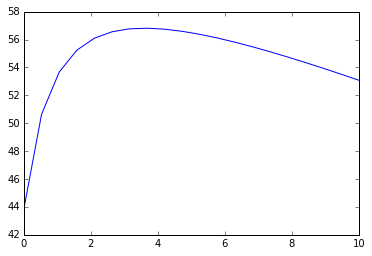

In [12]:
m = np.linspace(0,10,20)
plt.plot(m, EX - I - p*(B/(1+m))/D - m)

Which shows that over a range monitoring by the intermediary lowers the information rent that must be left with the agent faster than the cost of monitoring but eventually diminishing returns to this activity kick in (at somewhat less than 4 units of monitoring).

### Who monitors the monitor? Two-layered moral hazard

More likely the principal cannot directly contract on the intermediary's level of monitoring. The intermediary is supposed to spend resources $m$ to monitor the agent but if the government has no way to directly verify if this is happening or not, the intermediary may well be tempted to monitor at expense of zero but claim that it has monitored at expense $m$? 

The only way for the government to avoid this from happening is to put also put the intermediary on an incentive contract. The way to do this is to make the intermediary share in the agent's successess and failures. 

The Principal's contract design problem is to choose renumeration packages $(c_s,c_f)$ and $(w_s, w_f)$ to maximize:

$$ E(X|p) - E(c|p) - E(m|p) - I $$

subject to participation constraints for both the agent and the intermediary

$$ E(c|p) \geq 0$$ 

$$ E(w|p) \geq 0$$ 

the (now modified) incentive compatibility constraint for the agent:

$$E(c|p) \geq E(c|q) + \bar B(m)$$

and an incentive compatibility constraint for the intermediary monitor:

$$E(w|p) \geq E(w|q) + m$$


As was the case with the agent the cost of providing incentives to the intermediary monitor will depend on whether the intermediary can be made to lose money when the project fails or not.  

Let's first consider the case when this is not the case. In that event the intermediary is paid $0$ when the project fails and 

$$w_s = \frac{m}{\Delta}$$

when the project succeeds.  Note this is very much like the expression we derived for the bonus that had to be paid to the agent.  The expected cost of this intermediary renumeration contract (when $w_f =0$) is then:

$$E(w|p) = p \frac{m}{\Delta}$$

which is always larger than $m$ so long as $p > q$.  This suggest that the intermediary will also earn an information rent equal to 

$$E(w|p) - m = p \frac{m}{\Delta} - m > 0$$

since the monitor has to pay expenses $m$ while monitoring.

If on the other hand we can assume that intermediary's can be made to bear liability for the projects that they monitor and fail then this rent can be eliminated.  Consider the case of competitive bidding for the intermediary monitor job.  Different firms will compete to offer their services until the expected return to being an intermediary monitor is equal to what they could earn in their next best occupation which we assume to be zero.  Then

$$E(w|p) = m $$

which implies

$$w_f + p \frac{m}{\Delta}  = m $$

or 
$$ w_f = -p \frac{m}{\Delta} + m$$

(which then implies $w_s = (1-p)\frac{m}{\Delta} +m $)

One way to think of this is that the principal asks the intermediary put up portion 

$$I_m = p \frac{m}{\Delta} - m$$

of the total cost I of the project while the uninformed principal puts up the remainder 

$$I_u = I - I_m$$

Then if the project fails the intermediary loses $I_m + m$ (their investment and their monitoring cost).  If the project succeeds the intermediary pockets net of their monitoring cost:

$$w_s =  (1-p) \frac{m}{\Delta} - m$$

For a zero profit expected return.  

In this last competitive scenario the cost to the Principal of adding the intermediary to the contract is just the monitoring cost $m$ that must be compensated and not the larger information rent $p\frac{m}{\Delta}$ that we saw in the non-competitive case.  

The diagram below depicts net benefits under the competitive (solid line) and non-competitive (dashed line) scenarios:

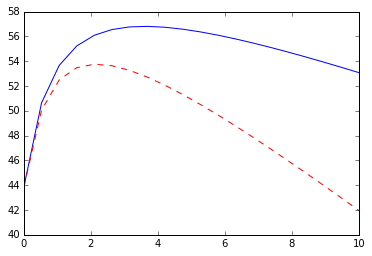

In [13]:
plt.plot(m, EX - I - p*(B/(1+m))/D - m)
plt.plot(m, EX - I - p*(B/(1+m))/D - p*m/D,'r--')

In the competitive scenario more monitoring is employed but this monitoring is effective at bringing down the total cost of implementation, leaving more net project benefits.  When the market for intermediaries is not competitive (and/or intermediaries are subject to limited liability constraints themselves) then monitoring still works (given our parameter assumptions in this example) but more of the project returns must be used for costly contractual bonus payments to motivate both the agent and the intermediary.  Less monitoring will be employed and the net project returns will be reduced

Keep in mind that net project returns could be even larger if agents themselves could be made to post bond (credibly pay fines) in the event of project failure.  Then no monitoring at all would be required and the agent could be paid the reservation wage (of zero in this example) and maximum project returns of $E(X|p) - I$ or 

In [14]:
EX - I

65.0

Could be achieved.

## Extensions

This is the type of model that made Jean-Jacques Laffont and Jean Tirole famous.  See for example their book on *A Theory of Incentives in Procurement and Regulation*.  Jean Tirole powers much of his other important book $Modern Corporate Finance$ with similar double-moral hazard models as well (and come to think of it his famous *The Theory of Industrial Organization* features this type of structure as well.  Many problems of fiscal federalism with Central, State and Local goverments can also be modeled this way.

Holmstrom and Tirole (1993) and Conning (1997) working with variations on an idea first introduced by Diamond (1984) note that if the intermediary monitors several independent (or at least not perfectly correlated) projects then the problem is like a multi-task principal - agent problem (except here between the principal and the intermediary) and it turns out that one can reduce the money that the intermediary has to put at risk in the event of failure by making their 'bonus' reward depend on success across several projects.  For example if the intermediary is monitoring two agents on projects with independent projects it may be cheaper to pay zero or low compensation to the intermediary when either or both projects fails but a healthy bonus if they both succeed, then to structure the two renumeration projects separately.

A variation on the above idea is also one way to understand joint liability contracts and 'peer monitoring' although in this case the problem is a bit more tricky.  For example suppose that we had two projects and two agents and we engaged each agent to work on their own project (say builing bridges as described above) and also as a monitor of the other agent.  The challenge is to then design a contract that then induces the two agents to choose effort on their bridge building and monitoring of the other agent strategically.  This can be solved as a mechanism design problem: the principal determines the terms of a joint liability contract implement the desired levels of monitoring and project effort as the solution to a Nash-game played between the agents, guarding against the possibility that the agents might collude with each other against the principal. 

Depending on the assumptions one makes about monitoring technologies and credible enforcement within groups, one can derive several interesting results that are relevant to understanding group versus individual liability loans as well as questions as to whether it might be preferable to monitor projects subject to corruption with 'community' monitoring or outside monitoring.  

Local community agents may have better information or monitoring technologies which might appear to make them better monitors, but they may fewer resources to put up as bond and/or they may be more likely to 'collude' against the outside principal.  